In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst01.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst02.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst03.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst04.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst05.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst10.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst11.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst12.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst13.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst14.jpg
/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211

In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [ ]:
DATADIR = '/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS'
CATEGORIES = ['STOP','WARNING','YIELD']
IMG_SIZE=100

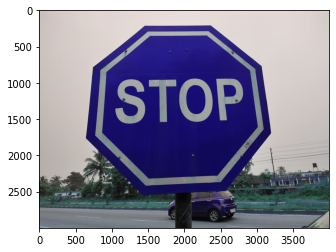

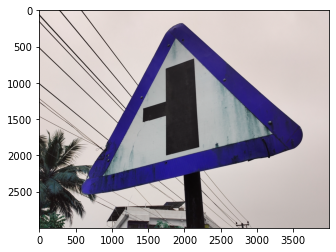

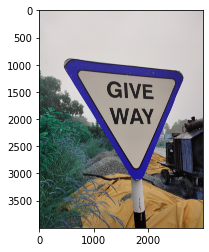

In [ ]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break

In [ ]:
#performing preprocessing steps...::

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [ ]:
print(len(training_data))

#storing trainig length for further use.

lenofimage = len(training_data)

1676


In [ ]:
#for image to be trained we have to convert the image to a array form so,that our model can train on it...!!
#and X should be of type (training_data_length , -1) because SVM takes 2D input to train
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)


print(X.shape)


##**flattening the array**

X = X/255.0

(1676, 30000)


In [ ]:
X[1]

array([0.78039216, 0.75294118, 0.74117647, ..., 0.56078431, 0.55294118,
       0.50980392])

In [ ]:
#note : y should be in array form compulsory.

y=np.array(y)

In [ ]:
y.shape

(1676,)

In [ ]:
#Now we are ready with our dependent and independent features, now its time for data modelling

#applying train_test_split on our data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
#fitting our data in SVM model
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
#predicting the X_test
y2 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 1.0


In [ ]:
#fromulating the Classification report

from sklearn.metrics import classification_report
print("",classification_report(y_test,y2))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00        34

    accuracy                           1.00       419
   macro avg       1.00      1.00      1.00       419
weighted avg       1.00      1.00      1.00       419



In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [ ]:
result

,original,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
414,0,0
415,2,2
416,0,0
417,0,0


In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import tensorflow.keras as keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
self.model = keras.Model(model[0], model[1])

img_path = '/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst12.jpg'

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

NameError: ignored

In [ ]:
print(model.predict(x))

NameError: ignored